<a href="https://colab.research.google.com/github/Jasjot-Kaur/MLPractice_Customer_Segmentation_using_KMeansClustering/blob/main/CustomerSegmentation_KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

In [ ]:
# importing libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans

In [ ]:
# importing and mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading file

dfc = pd.read_excel('/content/drive/MyDrive/AlmaBetter/K Means Clustering/customers.xlsx')

In [ ]:
dfc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dfc.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dfc.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Spending Score')

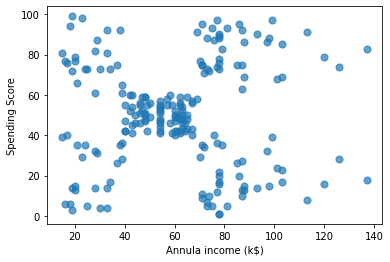

In [ ]:
# Plotting annula income and spendind score on a scatter plot

points = dfc.iloc[:, 3:5].values      # selecting values for all the rows for columns '3' and '4'
x = points[:,0]
y = points[:,1]

plt.scatter(x, y, s = 50, alpha = 0.7)
plt.xlabel('Annula income (k$)')
plt.ylabel('Spending Score')

### From the scatter plot, it appears that the data points fall into roughly 5 clusters.

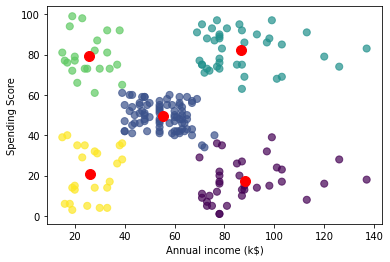

In [ ]:
# Applying k means to cluster using the 5 segments

kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c = predicted_cluster_indexes, s = 50, alpha = 0.7, cmap = 'viridis')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 100)

### The customers in the lower-right quadrant of the chart might be good ones to target with a promotion to increase their spending. Why? Because they have high incomes but low spending scores. 

In [ ]:
df = dfc.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [ ]:
cluster = kmeans.predict(np.array([[120, 20]]))[0]     # Get the cluster index for a customer with a high income and low spending score
clustered_df = df[df['Cluster'] == cluster]            # Filter the DataFrame to include only customers in that cluster
clustered_df['CustomerID'].values                      # Show the customer IDs

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

### These might be great customers to target with a promotion to entice them to buy more of your product. If you were going to roll out a loyalty program instead to reward customers who already buy your product, which cluster (or clusters) would you target?


### We would then target the top right cluster having customers with high income and high sepending.

In [ ]:
cluster = kmeans.predict(np.array([[120, 80]]))[0]
clustered_df = df[df['Cluster'] == cluster]
clustered_df['CustomerID'].values

array([124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200])

## Segment customers on all attributes


Now segment the customers again, this time using everything except the customer IDs. Start by replacing the strings "Male" and "Female" in the "Gender" column with 1s and 0s, a process known as label encoding. This is necessary because machine learning can only deal with numerical data.

#### * Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = dfc.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### Extract the values in the gender, age, income, and score columns.

In [ ]:
points = df.iloc[:, 1:].values

#### Use the elbow method to determine the optimum number of clusters based on these features.

Text(0, 0.5, 'Inertia')

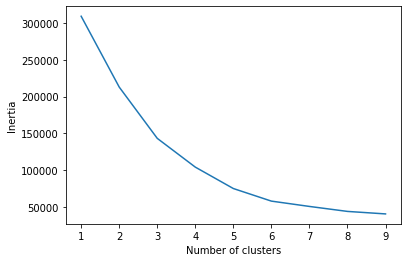

In [ ]:
inertias = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The elbow is less distinct this time, but let's segment the customers into five clusters again.

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=0)
kmeans.fit(points)

KMeans(n_clusters=5, random_state=0)

Add a column named "Cluster" with the index of the cluster that each customer falls into.

In [ ]:
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


You have clusters, but what do they mean? Let's compute the average age of the customers in each cluster.

In [ ]:
print(df.groupby('Cluster')['Age'].mean())

Cluster
0    45.217391
1    32.692308
2    43.088608
3    40.666667
4    25.521739
Name: Age, dtype: float64


Print a report showing a complete list of stats for every cluster.

In [ ]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i in range(len(kmeans.cluster_centers_)):
  age = df[df['Cluster'] == i]['Age'].mean()
  income = df[df['Cluster'] == i]['Annual Income (k$)'].mean()
  spend = df[df['Cluster'] == i]['Spending Score (1-100)'].mean()
  
  gdf = df[df['Cluster'] == i]
  females = gdf[gdf['Gender'] == 0].shape[0]
  males = gdf[gdf['Gender'] == 1].shape[0]

  results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0
